## Autor: Pablo Veloz M.
# Desafío - Expansiones basales

__Descripción__ 
- Una aplicación interesante de los modelos predictivos es poder predecir propiedades de materiales compuestos a partir de diferentes combinaciones en el proceso y creación de estos.
- Para este desafío trabajaremos con un dataset que contiene diferentes medidas de materiales con los que se hace la mezcla de concreto.
- Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir fuerzas compresivas de vigas de concreto, a esta capacidad de soportar fuerzas que buscan reducir la superficie o volumen de un cuerpo se le conoce como fuerza compresiva.

## __Ejercicio 1:__ Preparar el ambiente de trabajo
- Importe los módulos clásicos del trabajo en ciencia de datos.
- El archivo tiene el nombre compresive_strength_concrete.csv . Impórtelo y genere estadísticas descriptivas.
- En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la librería pyGAM .

In [57]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (10, 6)
#import cv_error as gfx
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from pygam import LinearGAM
from pygam.utils import generate_X_grid

import aux_funciones as auxiliares

In [58]:
df = pd.read_csv('compresive_strength_concrete.csv')
df.sample()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
317,251.8,0.0,99.9,146.1,12.4,1006.0,899.8,56,44.14


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [60]:
df.describe()


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## __Ejercicio 2:__ Descripción
- El vector objetivo tiene el nombre de Concrete compressive strength(MPa, megapascals) .
- Los nombres de las variables son muy poco amigables, dado que contienen espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga) renombrar las variables o acceder a éstas mediante notación de índice iloc .
- Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución. Decida si es necesario normalizarlos/escalarlos.

## Renombrar Columnas

In [61]:
for i in df.columns:
    print(i)

Cement (component 1)(kg in a m^3 mixture)
Blast Furnace Slag (component 2)(kg in a m^3 mixture)
Fly Ash (component 3)(kg in a m^3 mixture)
Water  (component 4)(kg in a m^3 mixture)
Superplasticizer (component 5)(kg in a m^3 mixture)
Coarse Aggregate  (component 6)(kg in a m^3 mixture)
Fine Aggregate (component 7)(kg in a m^3 mixture)
Age (day)
Concrete compressive strength(MPa, megapascals) 


In [62]:
df1=df.copy()
df1.columns = ['Cement', 'Blast_Furnace', 'Fly_Ash','Water','Superplasticizer','Coarce_Agregate','Fine_Aggregate','Age','Concrete_Compressive_Mpa']

In [63]:
df1.columns

Index(['Cement', 'Blast_Furnace', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarce_Agregate', 'Fine_Aggregate', 'Age', 'Concrete_Compressive_Mpa'],
      dtype='object')

## Inspeccionando Datos

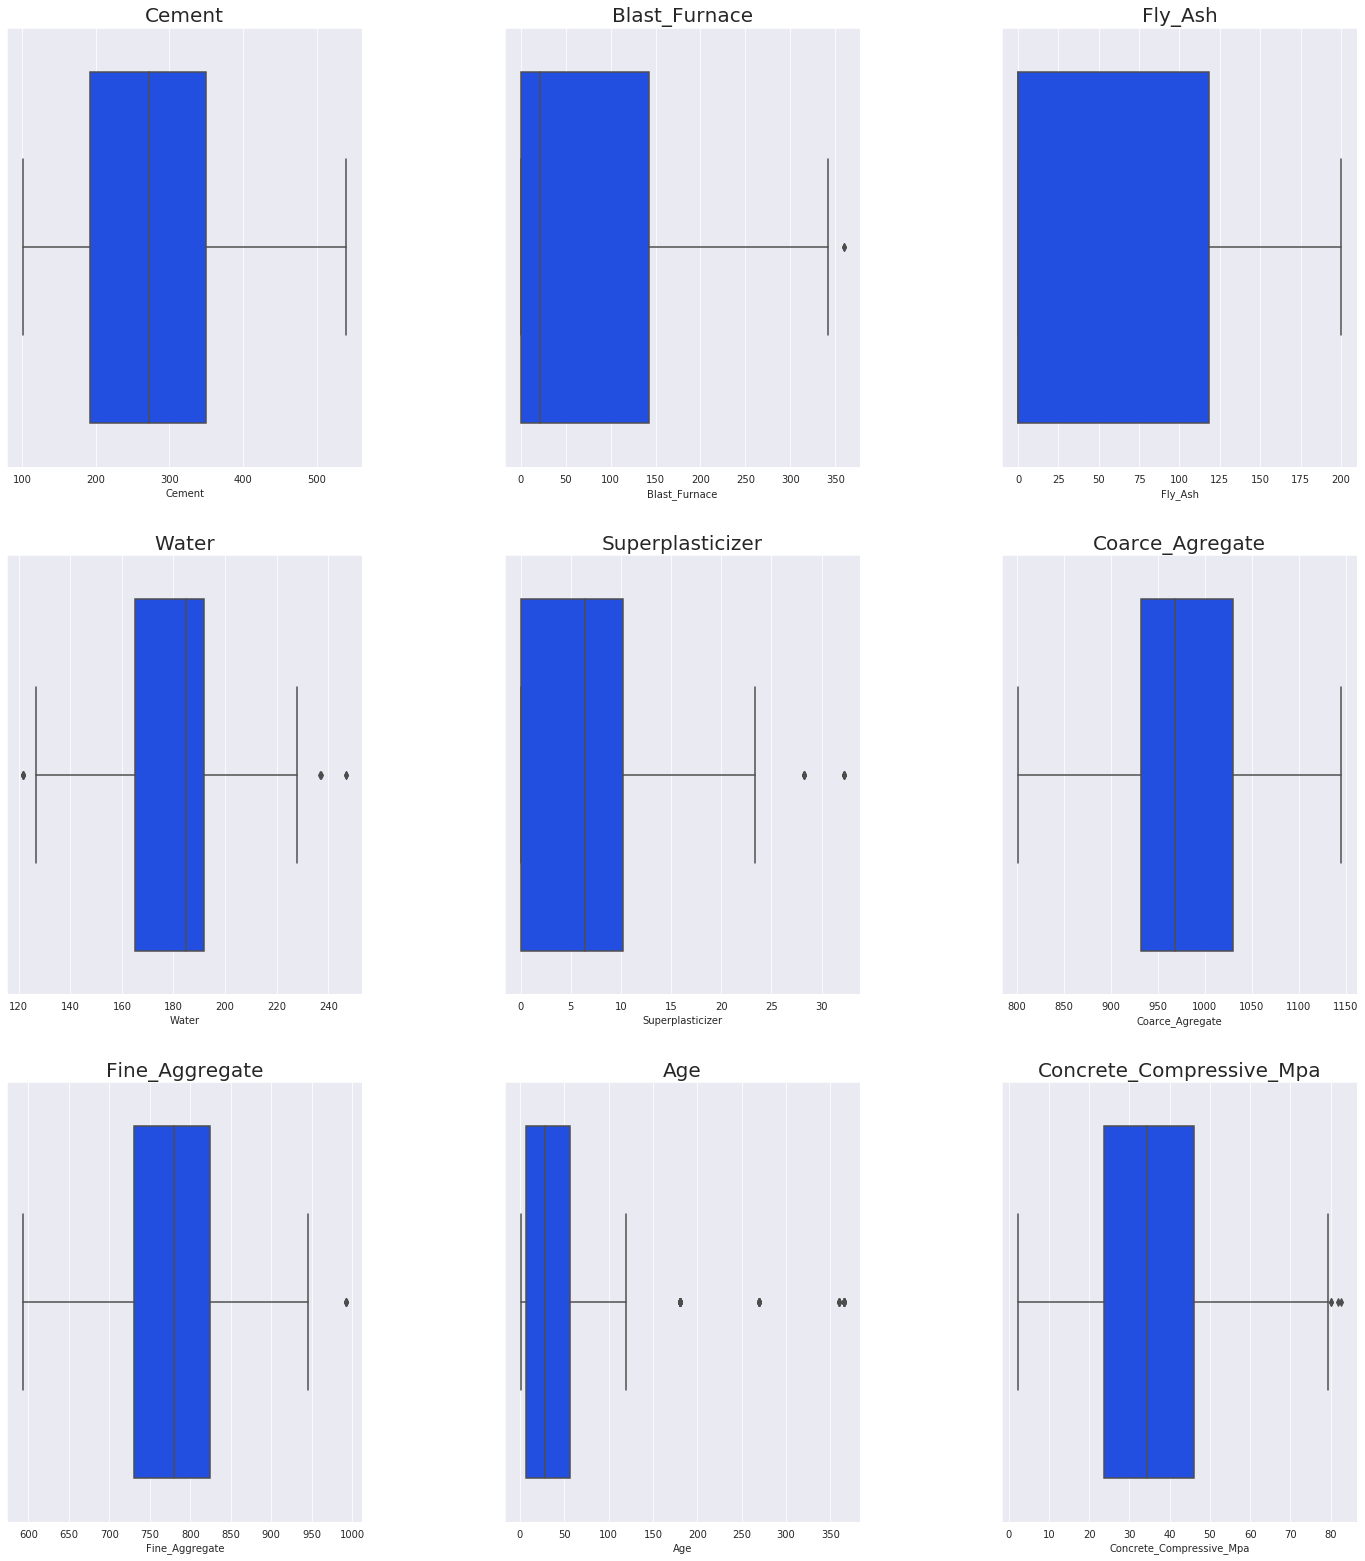

In [64]:
auxiliares.boxplot_num(df1,df1.columns)

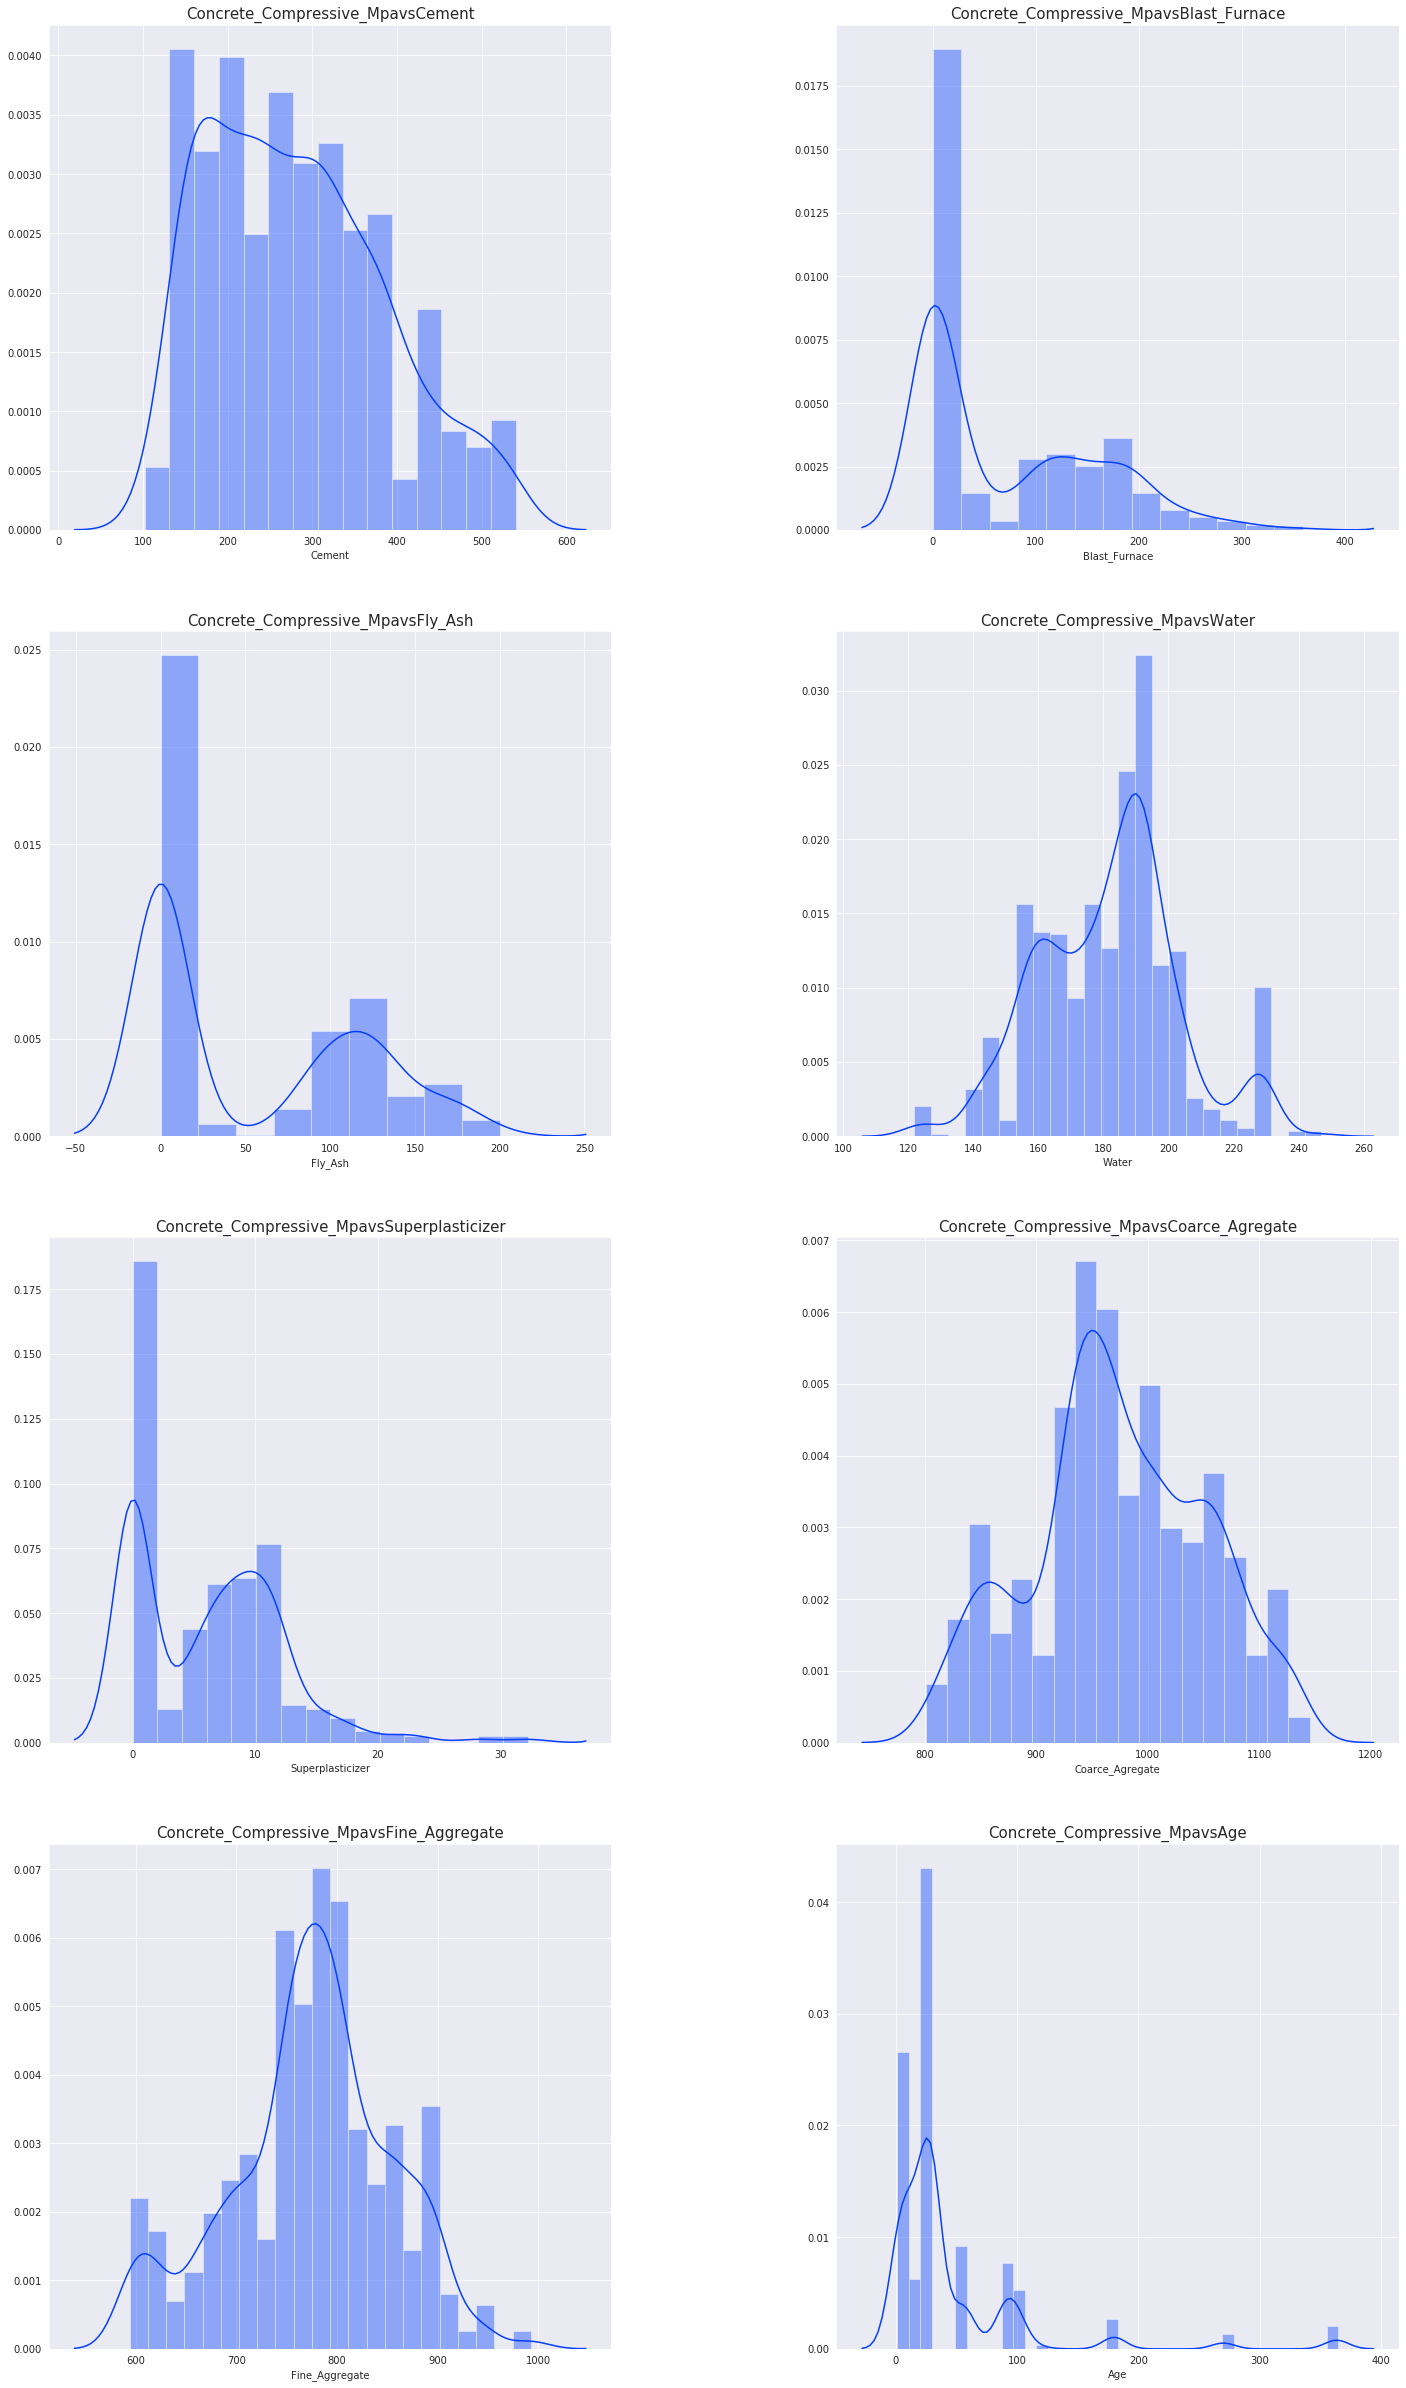

In [65]:
auxiliares.distplot_num(df1,df1.columns,"Concrete_Compressive_Mpa")

## Variable Objetivo `Concrete_Compressive_Mpa`

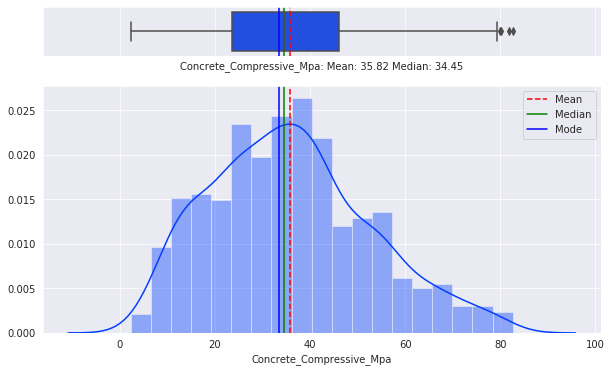

In [66]:
auxiliares.hist_box(df1,"Concrete_Compressive_Mpa")

/home/proveloz/anaconda3/lib/python3.7/site-packages/seaborn/palettes.py:777: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
/home/proveloz/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


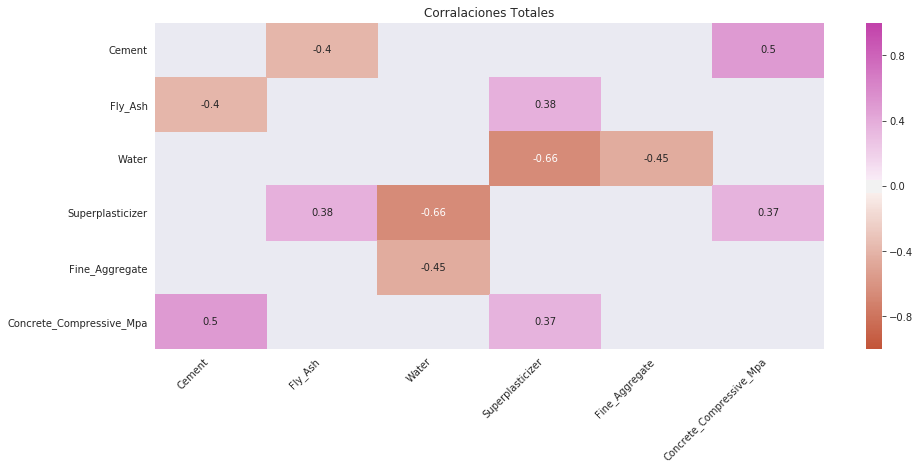

In [115]:
auxiliares.show_correlaciones(df1,.35)

## __Ejercicio 3:__ Modelo
- En base al vector objetivo, decida el mejor modelo e impórtelo con pygam . Condicional a ésto, importe las métricas de desempeño asociadas.
- Genere conjuntos de entrenamiento y validación.
- Genere un primer modelo sin implementar la función gridsearch . Repórte el hiperparámetro lam así como las métricas de desempeño asociadas.
- Genere un segundo modelo implementando gridsearch en lambda con un logspace entre -3 y 3. 
- Comente sobre el mejor hiperparámetro y sus métricas de desempeño.

In [77]:
#X_mat=df1.drop("Concrete_Compressive_Mpa",axis=1)
#y_vec=df1["Concrete_Compressive_Mpa"]

#X_train,X_test,y_train,y_test=train_test_split(X_mat,y_vec,test_size=0.3,random_state=1)

#std_scaler=StandardScaler().fit(X_train)
#X
#d.DataFrame(std_scaler.transform(X_train),columns=X_mat.columns)

X_mat=df1.drop("Concrete_Compressive_Mpa",axis=1)
y_vec=df1["Concrete_Compressive_Mpa"]
X_train,X_test,y_train,y_test=train_test_split(X_mat,y_vec,test_size=0.3,random_state=1)
std_scaler=StandardScaler().fit(X_train)
X_train=std_scaler.transform(X_train)
X_test=std_scaler.transform(X_test)

X_train_df=pd.DataFrame(X_train,columns=X_mat.columns)


## Modelo N°1 __sin__ gridsearch

In [90]:
from pygam import LinearGAM
sin_grid = LinearGAM().fit(X_train,y_train)
sin_grid.summary()


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     95.5823
Link Function:                     IdentityLink Log Likelihood:                                 -2980.9128
Number of Samples:                          721 AIC:                                             6154.9902
                                                AICc:                                            6185.2259
                                                GCV:                                               32.0128
                                                Scale:                                             24.4776
                                                Pseudo R-Squared:                                   0.9257
Feature Function   Data Type      Num

In [92]:
print("lamda:", round((sin_grid.lam),3))
auxiliares.report_metrics(sin_grid,X_test, y_test)

lamda: 0.6
Test R^2 accuracy: 0.879
Test RMSE accuracy: 5.636
Test MAE accuracy: 3.462


## Modelo N°2 __con__ gridsearch en lambda con un logspace entre -3 y 3. 

In [111]:

# definimos el rango de hiperparámetros a evaluar
search_params = {'lam': np.logspace(-3, 3, 8)}
# Creamos el modelo, lo entrenamos y buscamos los hiperparámetros mediante gridsearch
gam = LinearGAM().gridsearch(X_train, y_train, **search_params)
gam.summary()


100% (8 of 8) |##########################| Elapsed Time: 0:00:01 Time:  0:00:01


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    102.3245
Link Function:                     IdentityLink Log Likelihood:                                 -2965.5989
Number of Samples:                          721 AIC:                                             6137.8467
                                                AICc:                                             6172.806
                                                GCV:                                               32.0174
                                                Scale:                                             23.9586
                                                Pseudo R-Squared:                                   0.9281
Feature Function   Data Type      Num

In [87]:
print("lamda:", round((gam.lam),3))
auxiliares.report_metrics(gam,X_test, y_test)

lamda: 0.373
Test R^2 accuracy: 0.879
Test RMSE accuracy: 5.627
Test MAE accuracy: 3.336


### La siguiente grafica muestra el hecho de un alto R^2 entre `gam.predict` y `y_test`

Text(0.5, 1.0, 'gam predict vs y_test\nConcrete_Compressive_Mpa')

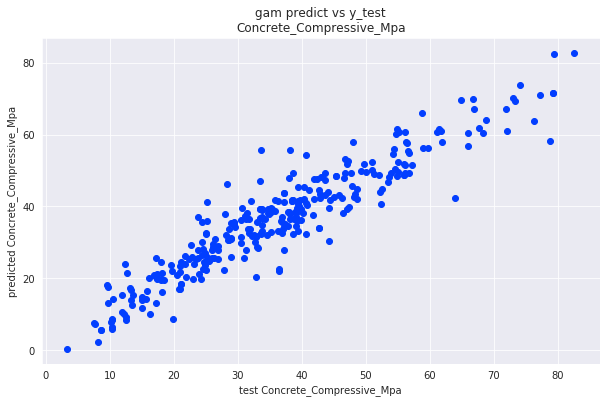

In [114]:
plt.scatter(y_test, gam.predict(X_test))
plt.xlabel('test Concrete_Compressive_Mpa')
plt.ylabel('predicted Concrete_Compressive_Mpa')
plt.title("gam predict vs y_test""\n"+"Concrete_Compressive_Mpa")

## Modelo N°3 con Hiperparametro $\lambda=50$

In [79]:
gam2 = LinearGAM(lam = 50).fit(X_train,y_train)
gam2.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     43.4606
Link Function:                     IdentityLink Log Likelihood:                                  -3214.049
Number of Samples:                          721 AIC:                                             6517.0192
                                                AICc:                                            6523.0032
                                                GCV:                                               38.0593
                                                Scale:                                             33.9534
                                                Pseudo R-Squared:                                   0.8883
Feature Function   Data Type      Num

In [93]:
print("lamda:", round((gam2.lam),3))
auxiliares.report_metrics(gam2,X_test, y_test)

lamda: 50.0
Test R^2 accuracy: 0.849
Test RMSE accuracy: 6.293
Test MAE accuracy: 4.337


- Conclusión:
    -  De los tres modelos N°1, N°2 y N°3. El que mejor métricas entrega es el N°2, y corresponde a un Gam con gridsearch np.logspace(-3, 3, 8), cuyo hiperparametro fue $\lambda = 0.378 $

## __Ejercicio 4:__  Dependencia Parcial
- En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada atributo.
- Para ello, genere una función que tenga como argumento de entrada el modelo estimado y
devuelva una grilla con todos los gráficos de dependencia parcial.
- Reporte brevemente sobre qué atributos están asociados a mayores y menores. niveles de
resistencia.

In [120]:
new_gam = LinearGAM(gam.lam)
def dependencia_parcial(model):
    model.fit(X_train, y_train)
    x_grid = generate_X_grid(model)
    attribute = X_train_df.columns
    cols = 2 
    rows = np.ceil(len(attribute)/cols)
    plt.figure(figsize=(18, 18))

    for i, n in enumerate(range(len(attribute))):
        plt.subplot(rows, cols, i + 1)
        partial_dep, confidence_intervals = model.partial_dependence(x_grid,feature = i + 1, width=.95)
        plt.plot(x_grid[:, n], partial_dep, color='dodgerblue')
        plt.fill_between(x_grid[:, n],confidence_intervals[0][:, 0],confidence_intervals[0][:, 1],color='dodgerblue', alpha=.25)
        plt.title(attribute[n])
        plt.plot(X_train_df[attribute[n]],[plt.ylim()[0]] * len(X_train_df[attribute[n]]),'|', color='orange', alpha=.5)
    plt.tight_layout()

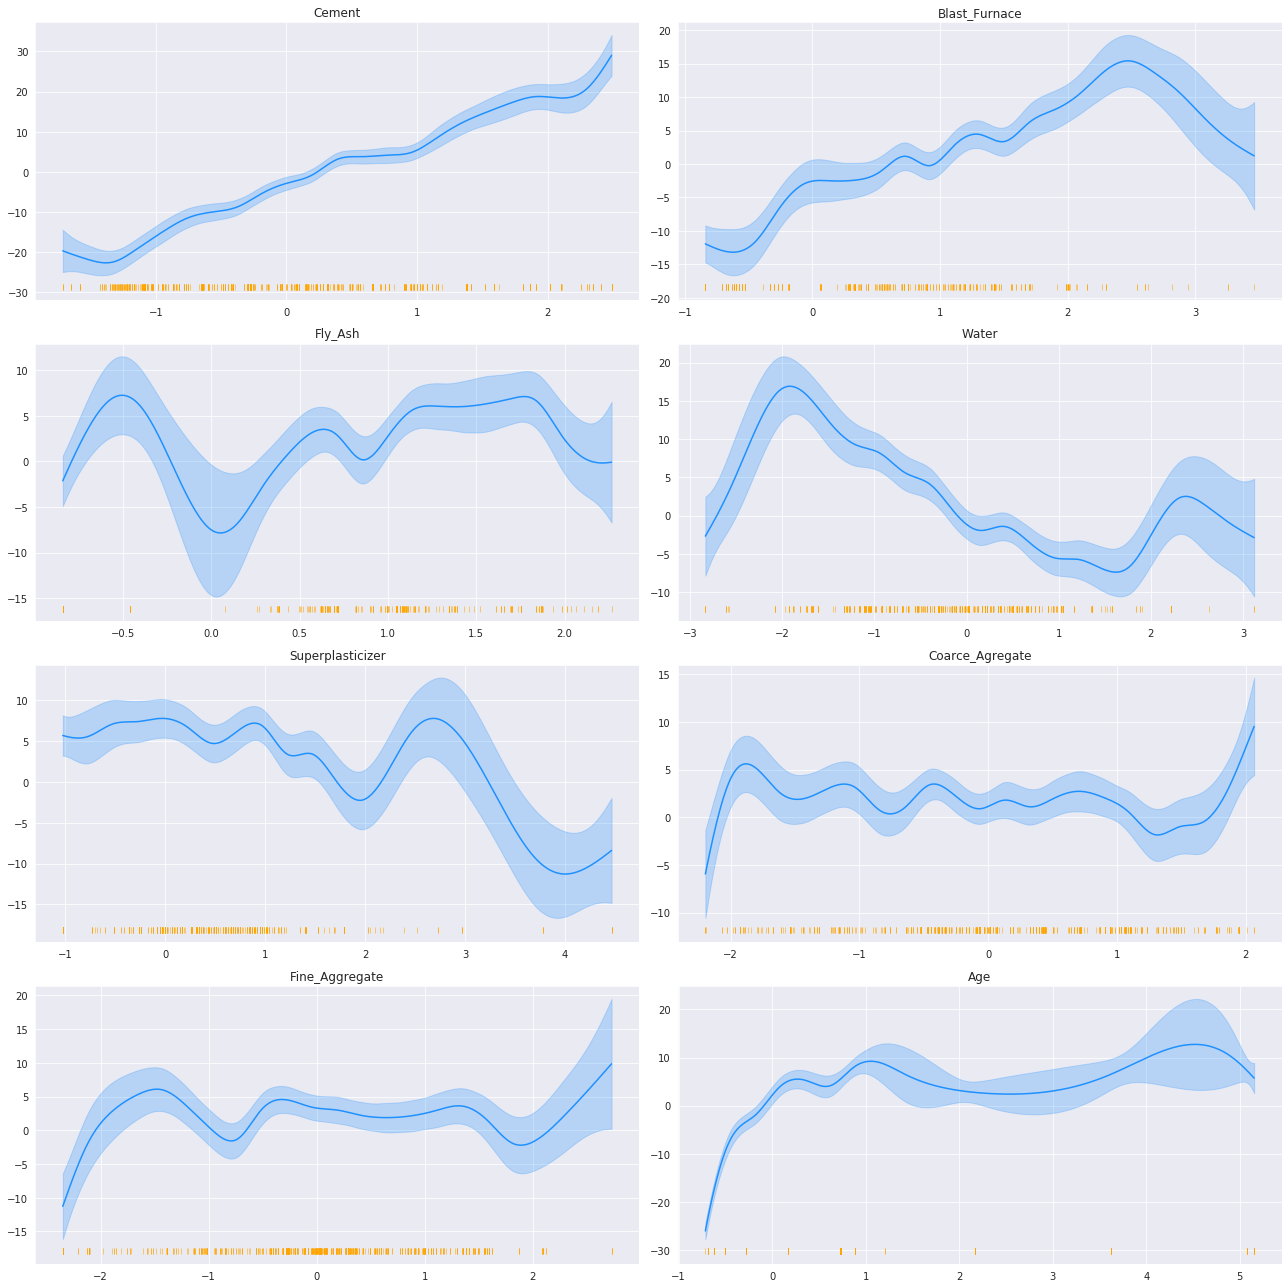

In [121]:
dependencia_parcial(new_gam)

__Analisis:__ 
- La variable Cemento se muestra con un menor nivel de resistencia, esto se puede deber a dos cosas de las cuales se observó, la primera es evidente la una afinidad lineal en la dependencia Parcial de los graficos y la segunda razón, desde la "alta" __correlación__ __.5__ positiva con el vector objetivo.
- La observaón indica que la variable fly_Ash es la que más nivel de resistencia tiene en relación a las demás variables, esto se mostraba desde los __distplot__.